In [5]:
import numpy as np
import pandas as pd

In [9]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [7]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

class TSNE:
    def __init__(self, perplexity=30, n_iter=1000, lr=200.0):
        self.perplexity = perplexity
        self.n_iter = n_iter
        self.lr = lr
        
    def row_score(self, dis):
        sigma_min = 1e-10
        sigma_max = 1e10
        sigma = (sigma_min + sigma_max) / 2
        
        while True:
            p = np.exp(-dis**2 / (2 * sigma**2))
            p = p / np.sum(p)
            
            H = -np.sum(p * np.log2(np.clip(p, a_min=1e-10, a_max=None)))
            perp_i = np.power(2, H)
            
            if np.abs(perp_i - self.perplexity) < 1e-5:
                break
            elif perp_i > self.perplexity:
                sigma_max = sigma
            else:
                sigma_min = sigma
                
            sigma = (sigma_min + sigma_max) / 2
            
        return p
                
    def pairwise_sim_score(self, X):
        n = X.shape[0]
        p_ij = np.zeros((n, n))
        for i in range(n):
            diff = X - X[i]
            dis = np.linalg.norm(diff, axis=1)
            p_ij[i, :] = self.row_score(dis)
        np.fill_diagonal(p_ij, 0)
        p_ij = (p_ij + p_ij.T) / (2 * n)
        return p_ij
    
    def project(self, X):
        np.random.seed(0)
        return np.random.randn(X.shape[0], 2) * 1e-4
    
    def sim_score_2d(self, X_t):
        n = X_t.shape[0]
        q_ij = np.zeros((n, n))
        for i in range(n):
            diff = X_t - X_t[i]
            dis = np.linalg.norm(diff, axis=1)
            q_ij[i, :] = np.power((1 + dis**2), -1)
        q_ij = q_ij / np.sum(q_ij)
        np.fill_diagonal(q_ij, 0)
        return q_ij
    
    def grad_desc(self, X):
        X_t = self.project(X)
        n = X.shape[0]
        
        for _ in range(self.n_iter):
            p_ij = self.pairwise_sim_score(X)
            q_ij = self.sim_score_2d(X_t)
            dc_dy = np.zeros((n, 2))
            
            for i in range(n):
                for j in range(n):
                    if i != j:
                        diff = X_t[i] - X_t[j]
                        dc_dy[i] += 4*(p_ij[i, j] - q_ij[i, j]) * diff / (1 + np.linalg.norm(diff)**2)
            
            X_t = X_t - self.lr * dc_dy
                    
        return X_t
    
    def fit(self, X):
        return self.grad_desc(X)

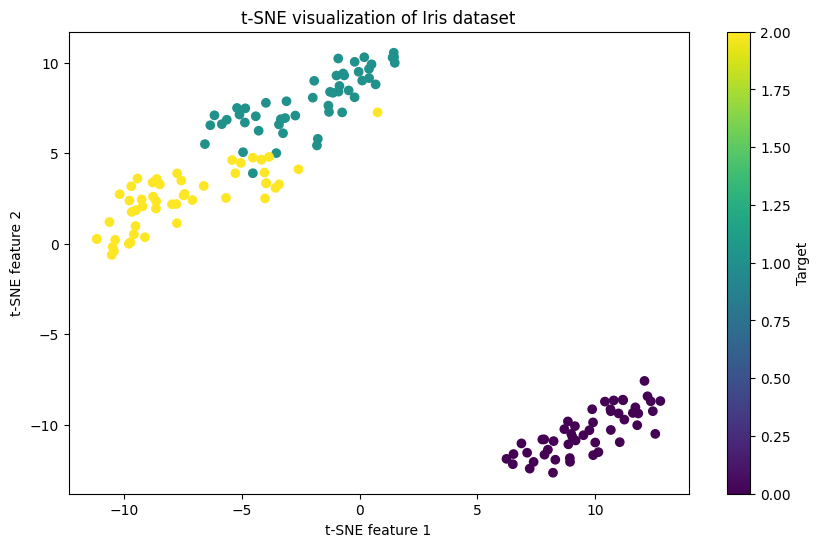

In [10]:
X = datasets.load_iris().data
tsne = TSNE(perplexity=30, n_iter=1000, lr=200.0)
X_tsne = tsne.fit(X)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=datasets.load_iris().target, cmap=plt.cm.viridis)
plt.colorbar(label='Target')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.title('t-SNE visualization of Iris dataset')
plt.show()

(150, 4)


<Figure size 1000x600 with 0 Axes>

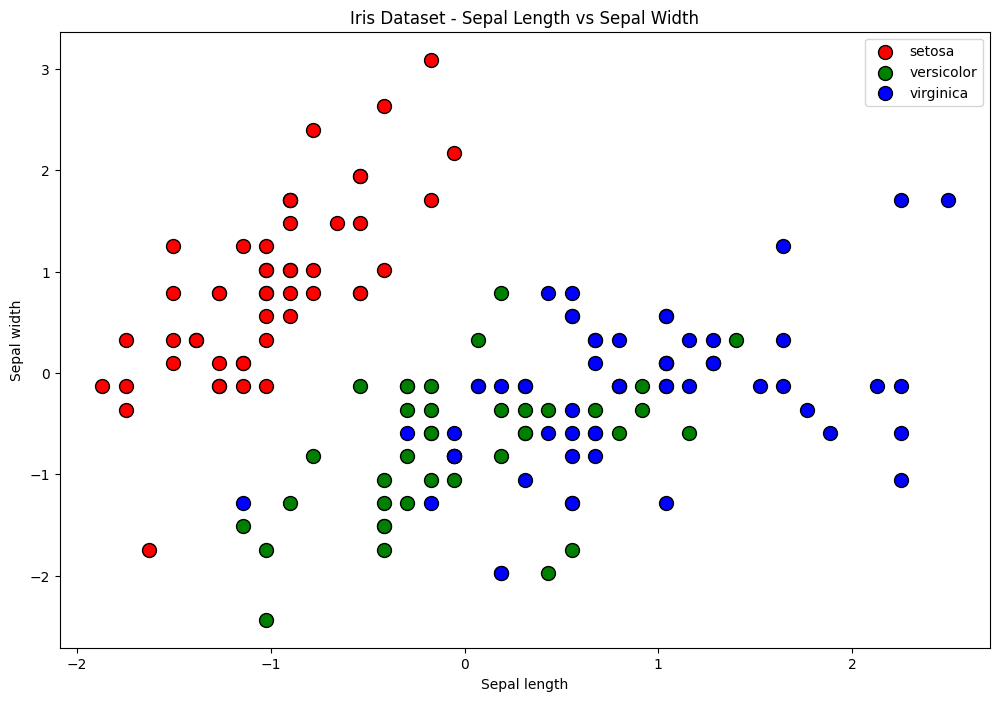

In [11]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
plt.figure(figsize=(10,6))
plt.figure(figsize=(12, 8))
print(X.shape)

# Plot each class with a different color
for target, color, label in zip([0, 1, 2], ['r', 'g', 'b'], iris.target_names):
    plt.scatter(X_scaled[y == target, 0], X_scaled[y == target, 1], c=color, label=label, edgecolor='k', s=100)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris Dataset - Sepal Length vs Sepal Width')
plt.legend()
plt.show()

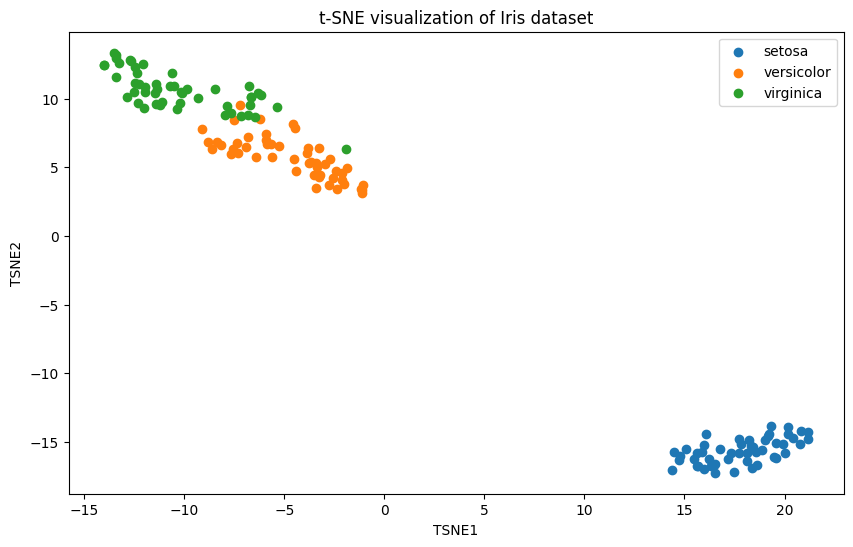

In [12]:
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
X_embedded = tsne.fit_transform(X)

# Create a DataFrame for easy plotting
df = pd.DataFrame(X_embedded, columns=['TSNE1', 'TSNE2'])
df['target'] = y

# Plotting
plt.figure(figsize=(10, 6))
for target in df['target'].unique():
    subset = df[df['target'] == target]
    plt.scatter(subset['TSNE1'], subset['TSNE2'], label=iris.target_names[target])

plt.legend()
plt.title('t-SNE visualization of Iris dataset')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.show()
